# Prieskumná analýza
Autori: Michal Zajic, Tibor Zalabai

Cvičenie: 18:00 Štvrtok

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## Personal data

In [262]:
personal_data = pd.read_csv('./data/personal_train.csv')
personal_data.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Edith Boudreaux,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",78.0,F,1940-02-11 00:00:00
1,1,Terry Terry,"PSC 4657, Box 5446\nAPO AP 58412",75.0,M,1943-04-25
2,2,Janet Washington,Unit 9759 Box 9470\nDPO AP 45549,41.0,F,1977/06/09
3,3,Margaret Chabot,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",74.0,F,1944-09-20
4,4,Colleen Satterwhite,"995 Frank Stravenue\nSouth Matthewport, TX 81402",37.0,F,1980-11-30


Stĺpec Unnamed: 0 je pravdepodobne ID overíme si to nasledovným testom.

In [263]:
allIds = range(0, personal_data.name.count())
unnamedIds = personal_data['Unnamed: 0']
allequals = set(allIds) == set(unnamedIds)
allequals

True

Vidíme, že stĺpec Unnamed je zhodný s ID, čiže ho môžeme vymazať.

In [264]:

personal_data = personal_data.drop(['Unnamed: 0'], axis=1)
personal_data.head()

,name,address,age,sex,date_of_birth
0,Edith Boudreaux,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",78.0,F,1940-02-11 00:00:00
1,Terry Terry,"PSC 4657, Box 5446\nAPO AP 58412",75.0,M,1943-04-25
2,Janet Washington,Unit 9759 Box 9470\nDPO AP 45549,41.0,F,1977/06/09
3,Margaret Chabot,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",74.0,F,1944-09-20
4,Colleen Satterwhite,"995 Frank Stravenue\nSouth Matthewport, TX 81402",37.0,F,1980-11-30


Výpis prvých 5 údajov, z ktorých si vieme hneď predstaviť, aké dáta sú v datasete reprezentované

In [265]:
len(personal_data.columns)

5

In [266]:
personal_data.dtypes

name              object
address           object
age              float64
sex               object
date_of_birth     object
dtype: object

V našom personal_data je konkrétne 6 stĺpcov, ktoré sú reprezentované nasledovne: id používateľa je unikátny integer. Name reprezentuje krstné meno a priezvisko. Adresa je, ako môžeme vidieť veľmi nekonzistentná, a nie je z prvého pohľadu vidieť, o aké údaje sa jedná. Vek je reprezentovaný floatom, pohlavie je označované jedným písmenom (pokiaľ sa jedná o validnú bunku). Posledným údajom je rok narodenia, ktorý hneď z prvého pohľadu nie je konzistentný, a je vo viacerých formátoch (YYYY/MM/DD alebo YYYY-DD-MM). Nami preferovaný formát dátumu, ktorým budeme nahradzovať všetky ostatné dátumy, bude: DD-MM-YYYY.

In [267]:
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 5 columns):
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), object(4)
memory usage: 87.5+ KB


Tento dataset nie je veľký, a jeho hlavnou náplňou sú osobné údaje.Všetky stĺpce obsahujú 2237 riadkov až na stĺpec age ktorý obsahuje o jeden záznam menej.

In [268]:
personal_data[personal_data['age'].isnull()]

,name,address,age,sex,date_of_birth
1988,Brenda Wojciechowski,"155 Johnson Circles Suite 311\nSouth Michael, ...",NaN,F,NaN


Potvrdilo sa že riadok s id 1988 nemá vyplnený age a teda ani date_of_birth tento údaj bude možné doplniť vekovým priemerom príslušného pohlavia, alebo mediánom (príslušného pohlavia alebo celkovo).

In [269]:
personal_data.describe()

,age
count,2236.000000
mean,51.822004
std,20.884439
min,1.000000
25%,36.000000
50%,54.000000
75%,67.000000
max,455.000000


Po zadaní príkazu Describe sa z vypočítateľných stĺpcov (čiže len Age). Môžeme v ňom vidieť vekový priemer, medián, horný a dolný kvartil.

Tu si môžeme všímnuť že nejaká osoba má vek 455 rokov ako hraničný bod na skontrolovanie či sa nenachádza viacej osob s nerealným vekom sme zvolili 100 rokov kedže nepredpokladáme že je takýchto prípadov nad 100 rokov veľa.

In [270]:
personal_data[personal_data['age'] > 100]

,name,address,age,sex,date_of_birth
2225,Kristin Little,"54780 Albert Plain\nPort Christopherland, WY 7...",455.0,F,1563-03-16


Pravdepodobne nastal preklep pri zadávaní dátumu narodenia kde mohli miesto 9 napísať omylom 5 a teda posunúť jej vek o 400 rokov. To je jedna z možností a opraviť by sme ju mohli jednoduchým odčítaním čísla 400 z veku a pričítaním 400 k roku narodenia, druhou je zmeniť vek na priemerný vek pohlavia v tomto prípade ženského a zmenit rok narodenia.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

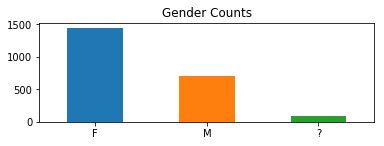

In [271]:
fig_dims = (2, 1)

plt.subplot2grid(fig_dims, (1, 0))
personal_data['sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

Graf nám hovorí že sa v personal_train nachádzajú aj dáta ktoré nemajú vyplnený gender. Dáta sa budú dať upraviť buď doplnením o prevládajúce pohlavie alebo nepočítať s tymito údajmi.

In [272]:
personal_data[(personal_data['sex'] != 'F') & (personal_data['sex'] != 'M')].count()

name             88
address          88
age              88
sex              88
date_of_birth    88
dtype: int64

Je ich presne 88 ktoré bude treba modifikovať.

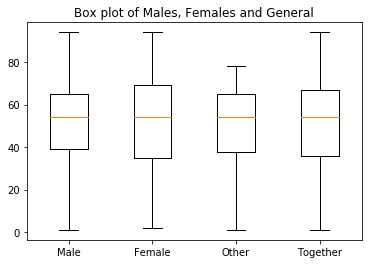

In [273]:
male = personal_data[personal_data['sex'] == 'M']
male = male[~np.isnan(male['age'])]

female = personal_data[personal_data['sex'] == 'F']
female = female[~np.isnan(female['age'])]


other = personal_data[personal_data['sex'] == '?']
other = other[~np.isnan(other['age'])]

data = [male['age'], female[female['age']< 150]['age'],other['age'], personal_data[personal_data['age']<150]['age']]

fig1, ax1 = plt.subplots()
ax1.set_title('Box plot of Males, Females and General')
ax1.boxplot(data)
plt.xticks([1,2,3,4], ['Male', 'Female','Other', 'Together'])
plt.show()

Prostredníctvom tohto Box Plou sme znázornili,  aký je je vekový priemer, horný kvartil a dolný kvartil veku mužov, žien a dohromady.

## Other data

Ďalším datasetom sú záznamy o ľuďoch, v ktorých sú napísané okrem mena, adresy, rasy, typu vzdelania, krajiny, rodinnému statusu, práci aj údaje z vyšetrení (ako napríklad, či je chorý, či má nádor, či mu boli poskytnuté rôzne vyšetrenia..)

In [274]:
#OTHER CSSV
other_data = pd.read_csv('./data/other_train.csv')
other_data.head()

,Unnamed: 0,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,0,Shondra Burns,1752 Charles Bypass Suite 311\nWest Kristinvil...,f,t,Some-college,f,109.0,0.96,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,10.0,Other-service,f,?,White,114
1,1,Tony Decaire,"33993 Jones Keys Suite 315\nNewtonview, OK 04814",f,t,HS-grad,f,98.0,0.83,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Sales,f,?,White,119
2,2,Ruby Presson,"05084 Robert Wall\nParkburgh, SC 25164",f,t,Bachelors,f,144.0,0.95,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,NaN,Sales,f,?,White,152
3,3,Randy Stewart,Unit 7068 Box 5314\nDPO AE 22517,f,t,Some-college,f,114.0,0.90,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,NaN,Prof-specialty,f,?,White,128
4,4,Harriet Griffin,"169 Allison Landing\nBrianton, AZ 04857",f,t,Masters,f,99.0,1.04,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,SVI,14.0,Prof-specialty,f,?,White,96


Opäť tu mame stĺpec Unnamed: 0 ktorý je pravdepodobne ID overíme si to nasledovným testom.

In [275]:
allIds = range(0, other_data.name.count())
unnamedIds = other_data['Unnamed: 0']
allequals = set(allIds) == set(unnamedIds)
allequals


True

Vidíme že sa opäť rovnajú a môžeme tento stĺpec zahodiť.

In [276]:
other_data = other_data.drop(['Unnamed: 0'],axis=1)

In [277]:
other_data.dtypes

name                          object
address                       object
query hyperthyroid            object
FTI measured                  object
education                     object
lithium                       object
TT4                          float64
T4U                          float64
capital-loss                 float64
capital-gain                 float64
tumor                         object
TSH                          float64
T3                           float64
fnlwgt                       float64
hours-per-week               float64
relationship                  object
sick                          object
workclass                     object
TT4 measured                  object
class                         object
marital-status                object
goitre                        object
native-country                object
hypopituitary                 object
medical_info                  object
on antithyroid medication     object
referral source               object
e

V našom datasete je najviac stĺpcov typu object, druhým najpočetnejším je float, a tretím typom je id. Jednotlivé stĺpce predstavujú rôzne merania v oblasti zdravotníctva najmä čo sa týka ochorenia štítnej žlazy.

In [278]:
len(other_data.columns)

33

Počet stĺpcov je oveľa väčší ako pri Personal_data, a to kvôli medicínskym údajom.

In [279]:
other_data.describe()

,TT4,T4U,capital-loss,capital-gain,TSH,T3,fnlwgt,hours-per-week,education-num
count,2128.000000,2038.000000,2277.000000,2.282000e+03,2048.000000,1805.000000,2278.000000,2275.000000,2048.000000
mean,109.487030,0.996749,72.166886,5.206411e+02,4.501296,2.025152,187211.198420,38.010549,10.041504
std,35.882326,0.192079,373.416778,5.963641e+04,20.248856,0.814956,107023.327923,11.842891,2.447641
min,2.000000,0.310000,0.000000,-1.502400e+06,0.005000,0.050000,19395.000000,1.000000,1.000000
25%,88.000000,0.880000,0.000000,0.000000e+00,0.447500,1.600000,116411.750000,35.000000,9.000000
50%,104.000000,0.980000,0.000000,0.000000e+00,1.400000,2.000000,177094.500000,40.000000,10.000000
75%,126.000000,1.080000,0.000000,0.000000e+00,2.600000,2.400000,232851.500000,40.000000,12.000000
max,430.000000,2.120000,3900.000000,1.355000e+06,478.000000,10.600000,913447.000000,99.000000,16.000000


V describe sme znázornili, okolo akých hodnôt sa prevažne pohybujú stĺpce ako TT4,T4U, TSH, hours per week, alebo capital Gain.

In [280]:
other_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 33 columns):
name                         2287 non-null object
address                      2287 non-null object
query hyperthyroid           2276 non-null object
FTI measured                 2278 non-null object
education                    2281 non-null object
lithium                      2279 non-null object
TT4                          2128 non-null float64
T4U                          2038 non-null float64
capital-loss                 2277 non-null float64
capital-gain                 2282 non-null float64
tumor                        2276 non-null object
TSH                          2048 non-null float64
T3                           1805 non-null float64
fnlwgt                       2278 non-null float64
hours-per-week               2275 non-null float64
relationship                 2279 non-null object
sick                         2275 non-null object
workclass                    2276 n

Nie každý záznam má vyplnené všetky údaje bude potrebné spracovať jednotlivé stĺpce a doplniť ich.

V stĺpci T3 zaznamenávame príliš veľa NAN riadkov (cez 400), tieto hodnoty budeme analyzovať a dopĺňať na základe toho, či zistíme závislosti medzi ním, a stĺpcom T3 measured (ktorý je zatiaľ zakapsulovaný v Medical_Info)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

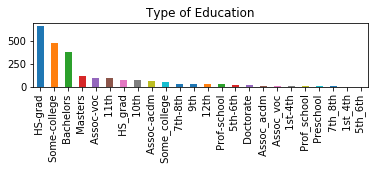

In [281]:
fig_dims = (3, 1)

plt.subplot2grid(fig_dims, (1, 0))
other_data['education'].value_counts().plot(kind='bar', 
                                    title='Type of Education')
plt.xticks(rotation=90)

V nasledujúcom stĺpcovom grafe demonštrujeme rôznorodosť dosiahnutého vzdelania u ľudí v datasete. Ako vidíme, najpočetnejším vzdelaním, aký ľudia v našom datasete dosiahli, je stredná škola.

/home/UX/mzajicux/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/UX/mzajicux/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/UX/mzajicux/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


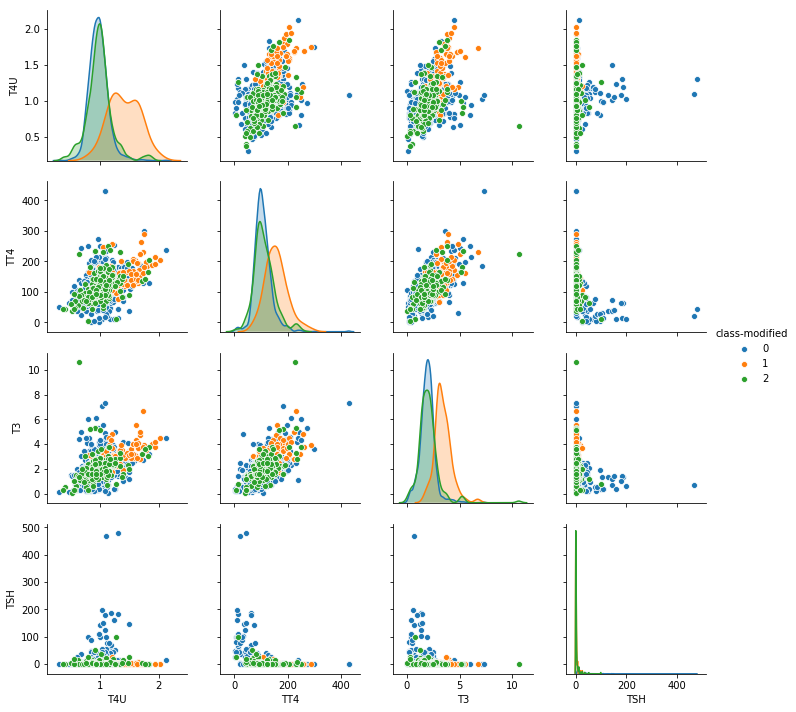

In [319]:
other_data['class-modified'] = other_data['class'].map(lambda x: 0 if 'negative' in str(x) else (1 if 'increased' in str(x) else 2))
sns.pairplot(other_data, hue="class-modified",vars=["T4U","TT4","T3","TSH"])

Tu môžeme vidieť že sme sa snažili upraviť si stĺpec class na hodnoty 0=negative, 1=increased binding protein, 2=decreased binding protein a následne pomocu pairplotu zobrazujeme závislosti jednotlivých hodnôt voči stĺpcu class. Hneď v prvom grafe si môžeme všimnúť že hodnoty T4U sú menšie v prípade že má pacient class increased  binding protein. Tento upravený stĺpec sme nazvali class-modified a budeme s ním pracovať aj pri jednej z našich hypotéz teda si ho ponecháme.

In [283]:
other_data['query hyperthyroid'].value_counts()

f      2135
t       140
f.8       1
Name: query hyperthyroid, dtype: int64

In [284]:
other_data['FTI measured'].value_counts()

t      2043
f       234
t.4       1
Name: FTI measured, dtype: int64

In [285]:
other_data['lithium'].value_counts()

f      2267
t        11
f.9       1
Name: lithium, dtype: int64

In [286]:
other_data['hypopituitary'].value_counts()

f       2281
f.12       1
Name: hypopituitary, dtype: int64

In [287]:
other_data['on antithyroid medication'].value_counts()

f        2026
FALSE     113
F         113
t          24
TRUE        2
T           1
f.2         1
Name: on antithyroid medication, dtype: int64

In [288]:
other_data['TBG measured'].value_counts()

f       2281
f.14       1
Name: TBG measured, dtype: int64

V predchádzajúcich countoch a nasledujúcich grafoch poukazujeme na to, v akom pomere sú TRUE/FALSE stĺpce. V žiadnom zo stĺpcov nie je vybalancovaný počet true a false záznamov. Dokonca môžeme vidieť nekonzistentnosť dát a chybné údaje ako f.14, t.4 a podobne. Tieto chybné dáta jednoducho prerobíme aby nám ostali len hodnoty t a f. V nasledujúcich grafoch nezohľadňujeme tieto hodnoty.

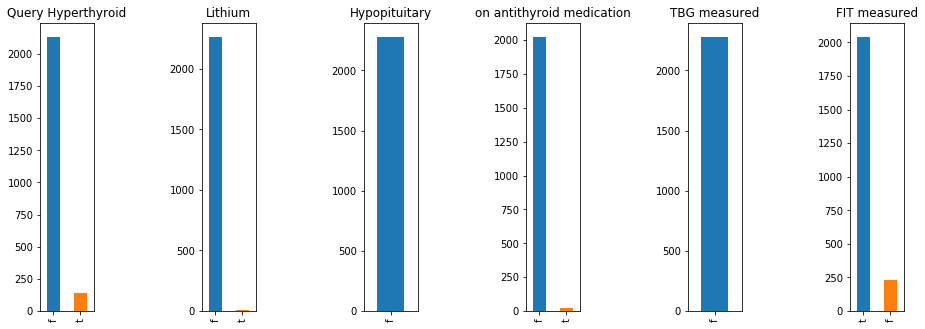

In [289]:


fig, axs = plt.subplots(1,6)
other_data[(other_data['query hyperthyroid'] == 't') | (other_data['query hyperthyroid'] == 'f')]['query hyperthyroid'].value_counts().plot(ax=axs[0],kind='bar', 
                                    title='Query Hyperthyroid')

other_data[(other_data['lithium'] == 't') | (other_data['lithium'] == 'f')]['lithium'].value_counts().plot(ax=axs[1],kind='bar', 
                                    title='Lithium')
other_data[(other_data['hypopituitary'] == 't') | (other_data['hypopituitary'] == 'f')]['hypopituitary'].value_counts().plot(ax=axs[2],kind='bar', 
                                    title='Hypopituitary')
other_data[(other_data['on antithyroid medication'] == 't') | (other_data['on antithyroid medication'] == 'f')]['on antithyroid medication'].value_counts().plot(ax=axs[3],kind='bar', 
                                    title='on antithyroid medication')
other_data[(other_data['TBG measured'] == 't') | (other_data['TBG measured'] == 'f')]['TBG measured'].value_counts().plot(ax=axs[4],kind='bar', 
                                    title='TBG measured') 
other_data[(other_data['FTI measured'] == 't') | (other_data['FTI measured'] == 'f')]['FTI measured'].value_counts().plot(ax=axs[5],kind='bar', 
                                    title='FIT measured')
plt.subplots_adjust(left=4, bottom=3, right=6, top=4, wspace=2, hspace=1)

#there are more True/false collumns such as:
# tumor, sick, tt4 masured, goitre, 


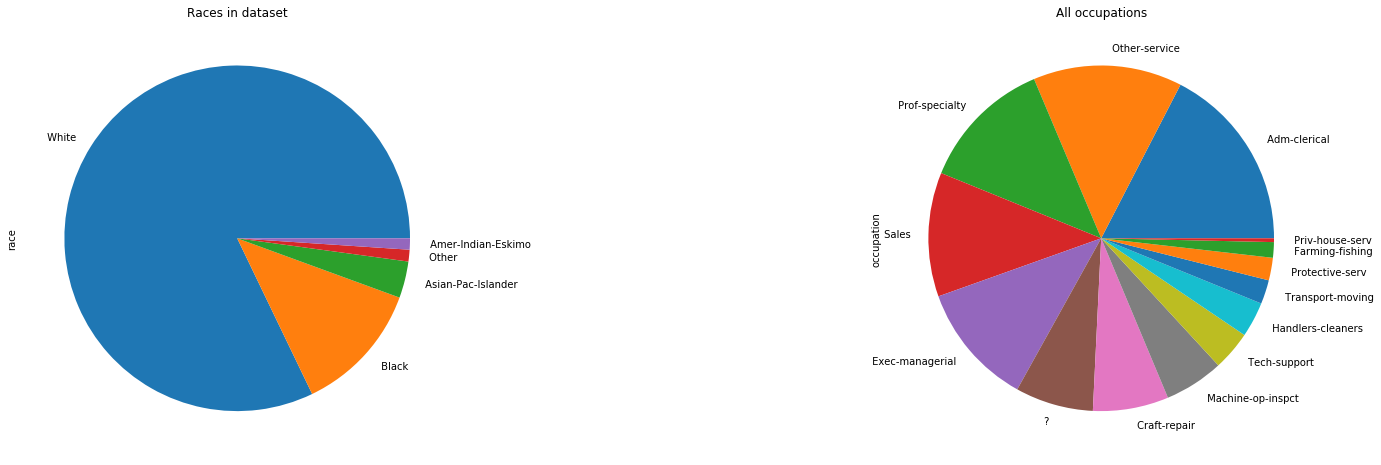

In [290]:
fig, axs = plt.subplots(1,2)
other_data.race.value_counts().plot(ax=axs[0],kind='pie', title='Races in dataset')
other_data.occupation.value_counts().plot(ax=axs[1],kind='pie',title='All occupations')
plt.subplots_adjust(left=0, bottom=0, right=3, top=1.5, wspace=1, hspace=0)
#fix this plsss

V nasledujúcich 2 grafov vidíme už spomenutú rôznorodosť záznamov (aj pri type zamestnania alebo rase). Prevládajú u nás predovšetkým ľudia s bielou rasou potom sú to černosi a nakoniec zvyšné rasy.

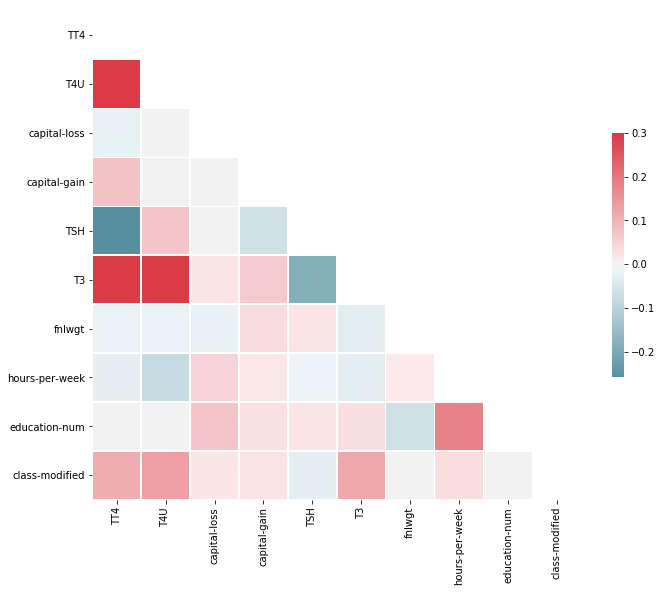

In [291]:

corr = other_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Z tejto teplotnej mapy je jasne vidieť že hodnoty T3 a TT4 medzi sebou silne korelujú a tak isto medzi T3 a T4U.

In [292]:
other_data["relationship"].value_counts()

 Not-in-family     754
 Husband           446
 Own-child         406
 Unmarried         384
 Wife              211
 Other-relative     78
Name: relationship, dtype: int64

Pomocou boxplotu sme znázornili distribúciu dát v stĺpci hours-per-week a vidíme že za predpokladu že tieto hodnoty znamenajú počet hodín u doktora za týždeň priemer sa pohybuje okolo 40 hodín týždenne.

## Hypotézy

### 1. Ak má človek increased binding protein má nižšiu hodnotu T4U ako človek z decreased binding protein.

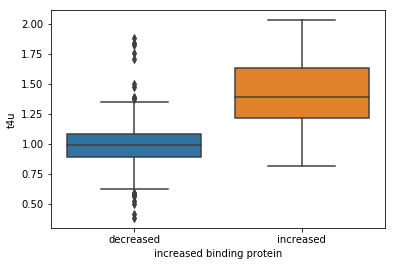

In [318]:
t4u_increased = other_data[other_data['class-modified']== 1 ]['T4U']
t4u_increased = t4u_increased.astype(str).astype(float)
t4u_increased = t4u_increased[~t4u_increased.isnull()]
t4u_decreased = other_data[other_data['class-modified']== 2 ]['T4U']
t4u_decreased = t4u_decreased.astype(str).astype(float)
t4u_decreased = t4u_decreased[~t4u_decreased.isnull()]
increased = other_data["class-modified"][(other_data["class-modified"] == 1) | (other_data["class-modified"] == 2)]
increased = increased.map(lambda x: 'increased' if x ==1 else 'decreased')
df = pd.DataFrame({'increased binding protein':increased, 't4u':other_data['T4U']})
sns.boxplot('increased binding protein','t4u',data = df)

V danom boxplote ukazujeme, aké T4U majú záznamy ľudí, ktorí buď majú increased protein binding alebo majú negative alebo decreased protein binding.

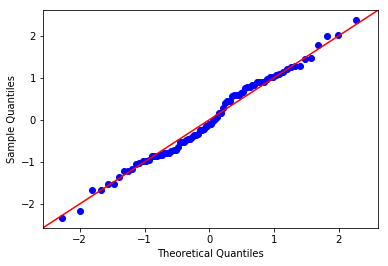

In [294]:
_ = sm.ProbPlot(t4u_increased,fit=True).qqplot(line='45')

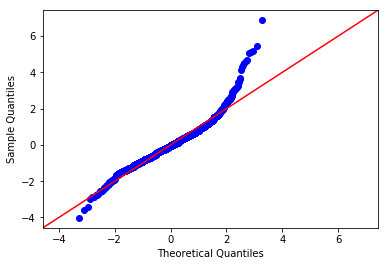

In [295]:
_ = sm.ProbPlot(t4u_not_increased,fit=True).qqplot(line='45')

Na znázornených QQ grafoch môžeme vidieť že pre množinu t4u_increased sa dá hovoriť o normálnom rozdelení kedže hodnoty nie sú až tak vychýlene no u t4u_decreased toto už trvrdit nemôžeme.

/home/UX/mzajicux/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


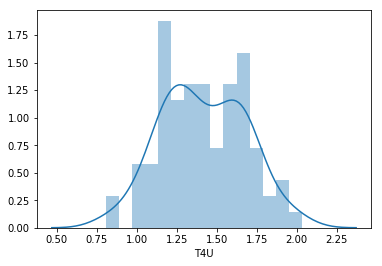

In [296]:
sns.distplot(t4u_increased,bins=15)

/home/UX/mzajicux/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


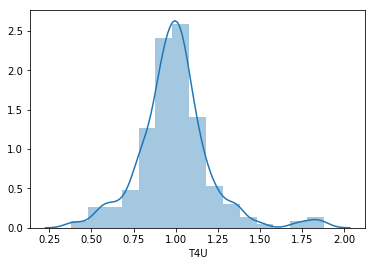

In [297]:
sns.distplot(t4u_decreased,bins=15)

In [298]:
stats.shapiro(t4u_increased)

(0.9849932193756104, 0.43063196539878845)

In [299]:
stats.shapiro(t4u_decreased)

(0.9307681322097778, 7.027276982540798e-09)

Shapiro test nám potvrdil že množina t4u_increased je z normálneho rozdelenia no t4u_decreased nie. Shapiro ma ale jednu zlú vlastnosť a to že mu stačí málo vychýlených hodnôt na to aby prehlásil že množina nie je z normálneho rozdelenia. Skúsime teda použiť Andersenov test.

In [300]:
stats.anderson(t4u_increased)

AndersonResult(statistic=0.5698796690558936, critical_values=array([0.552, 0.629, 0.754, 0.88 , 1.046]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [301]:
stats.anderson(t4u_decreased)

AndersonResult(statistic=3.88209849499799, critical_values=array([0.566, 0.645, 0.774, 0.903, 1.074]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Aby platilo že množina je z normálneho rozdelenia musí byť štatistická hodnota menšia ako jednotlivé kritické hodnoty. Kedže test pre t4u_decreased vyhodnotil štatistickú hodnotu tak že ani jeden z kritických bodov nie je väčší znamená to že množina nepochádza z normálneho rozdelenia. Teda použijeme Mann-Whitney U test.

In [302]:
stats.mannwhitneyu(t4u_increased, t4u_decreased)

MannwhitneyuResult(statistic=1881.5, pvalue=2.7852921788990676e-28)

p < 0.001 teda pravdepodobnosť toho že nulová hypotéza je pravdivá ale my ju zamietam je menšia ako 1 promile.

/home/UX/mzajicux/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


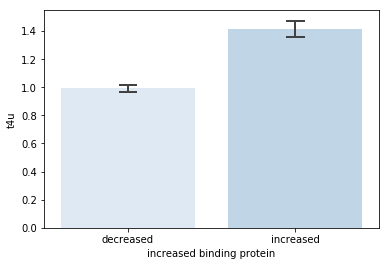

In [303]:
sns.barplot(x='increased binding protein', y='t4u', data=df ,
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

Štatisticky sa teda naša hypotéza potvrdila.

### 2.  Ak má hypertyreózu (nadmerná produkcia hormónov štítnej žlazy) tak má vyšiu T3

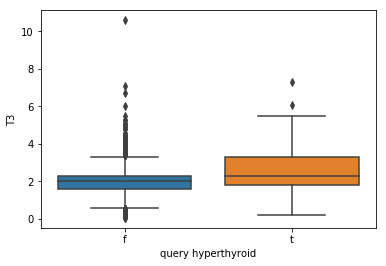

In [304]:
has_query_hyperthyroid = other_data[other_data['query hyperthyroid'] == 't']['T3']
has_query_hyperthyroid = has_query_hyperthyroid[~has_query_hyperthyroid.isnull()]
no_query_hyperthyroid = other_data[other_data['query hyperthyroid'] == 'f']['T3']
no_query_hyperthyroid = no_query_hyperthyroid[~no_query_hyperthyroid.isnull()]
query_hyperthyroid = other_data[(other_data['query hyperthyroid'] == 't') | (other_data['query hyperthyroid'] == 'f')]['query hyperthyroid']
df = pd.DataFrame({'query hyperthyroid':query_hyperthyroid, 'T3':other_data['T3']})
sns.boxplot('query hyperthyroid','T3',data = df)


V tomto boxplote vidíme, že pokiaľ majú ľudia zvýšenú produkciu štítnej žľazy, tak majú obvykle vyššie hodnoty T3.

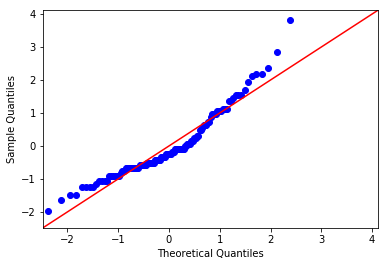

In [305]:
_ = sm.ProbPlot(has_query_hyperthyroid,fit=True).qqplot(line='45')

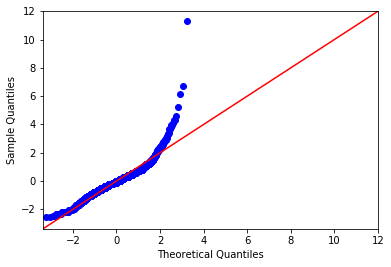

In [306]:
_ = sm.ProbPlot(no_query_hyperthyroid,fit=True).qqplot(line='45')

Už na prvý pohľad nám môže byť jasné že tieto množiny nepochádzajú z normálneho rozdelenia. Takže budeme postupovať ako v prvom prípade a použijeme viac testov na toto overenie.

/home/UX/mzajicux/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


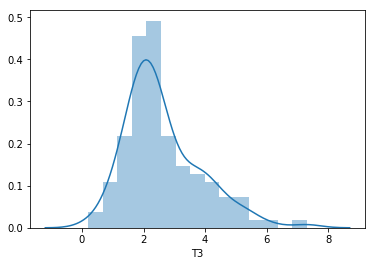

In [307]:
sns.distplot(has_query_hyperthyroid,bins=15)

/home/UX/mzajicux/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


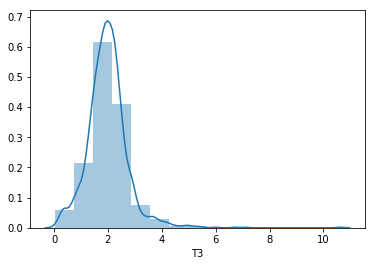

In [308]:
sns.distplot(no_query_hyperthyroid,bins=15)

Obidva distploty nám ukazujú Gausovu krivku aj keď QQ plot jasne hovoril že množina nie je z normálneho rozdelenia. Opäť si to overim Shapirom a Andersenom.

In [309]:
stats.shapiro(has_query_hyperthyroid)

(0.9289237856864929, 1.1386377082089894e-05)

In [310]:
stats.shapiro(no_query_hyperthyroid)

(0.9031978249549866, 2.405497315087685e-31)

Shapirov test ukázal že obidve množiny nie sú z normálneho rozdelenia. Skúsime Andersonov test.

In [311]:
stats.anderson(has_query_hyperthyroid)

AndersonResult(statistic=2.8147465409335837, critical_values=array([0.558, 0.635, 0.762, 0.889, 1.057]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [312]:
stats.anderson(no_query_hyperthyroid)

AndersonResult(statistic=22.047187637665274, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Anderson tak isto ukázal že množiny nie sú z normálneho rozdelenia a tak použijeme Mann-Whitney U test.

In [317]:
stats.mannwhitneyu(has_query_hyperthyroid,no_query_hyperthyroid)

MannwhitneyuResult(statistic=67548.5, pvalue=1.5089577496008348e-08)

p < 0.001 teda pravdepodobnosť toho že nulová hypotéza je pravdivá ale my ju zamietam je men3ia ako 1 promile. 

/home/UX/mzajicux/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


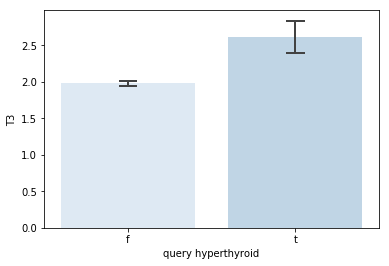

In [314]:
sns.barplot(x='query hyperthyroid', y='T3', data=other_data[(other_data['query hyperthyroid'] == 't') | (other_data['query hyperthyroid'] == 'f')], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

Štatisticky sa teda naša hypotéza potvrdila.